In [1]:
import os 

In [2]:
%pwd

'a:\\git_hub_projects\\ml\\CrashLens Aviation Crash Pattern Analysis & Prediction\\notebooks'

In [3]:
os.chdir("../")

In [4]:
%pwd

'a:\\git_hub_projects\\ml\\CrashLens Aviation Crash Pattern Analysis & Prediction'

In [5]:
import pandas as pd


df = pd.read_csv("artifacts/final_data.csv")

# Basic EDA
print(df.shape)
print(df.columns.tolist())
display(df.head())
display(df.info())
display(df.describe())

# Missing values
print("Null values:\n", df.isnull().sum())


(1250, 8)
['unnamed:_0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg']


,unnamed:_0,acc.date,type,reg,operator,fat,location,dmg
0,0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,2022-01-12,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unnamed:_0  1250 non-null   int64 
 1   acc.date    1247 non-null   object
 2   type        1250 non-null   object
 3   reg         1204 non-null   object
 4   operator    1243 non-null   object
 5   fat         1244 non-null   object
 6   location    1250 non-null   object
 7   dmg         1250 non-null   object
dtypes: int64(1), object(7)
memory usage: 78.2+ KB


None

,unnamed:_0
count,1250.000000
mean,624.500000
std,360.988227
min,0.000000
25%,312.250000
50%,624.500000
75%,936.750000
max,1249.000000


Null values:
 unnamed:_0     0
acc.date       3
type           0
reg           46
operator       7
fat            6
location       0
dmg            0
dtype: int64


In [6]:
%pwd

'a:\\git_hub_projects\\ml\\CrashLens Aviation Crash Pattern Analysis & Prediction'

In [7]:
from src.aviation_crash.eda import EDA

eda = EDA("artifacts/final_data.csv")
eda.load_data()

[2025-07-13 02:50:03,018]: Loading data from artifacts/final_data.csv


<Axes: xlabel='dmg'>

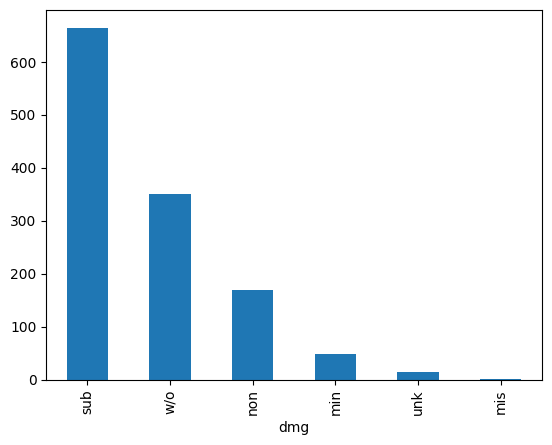

In [8]:
df['dmg'].value_counts().head(10).plot(kind='bar')


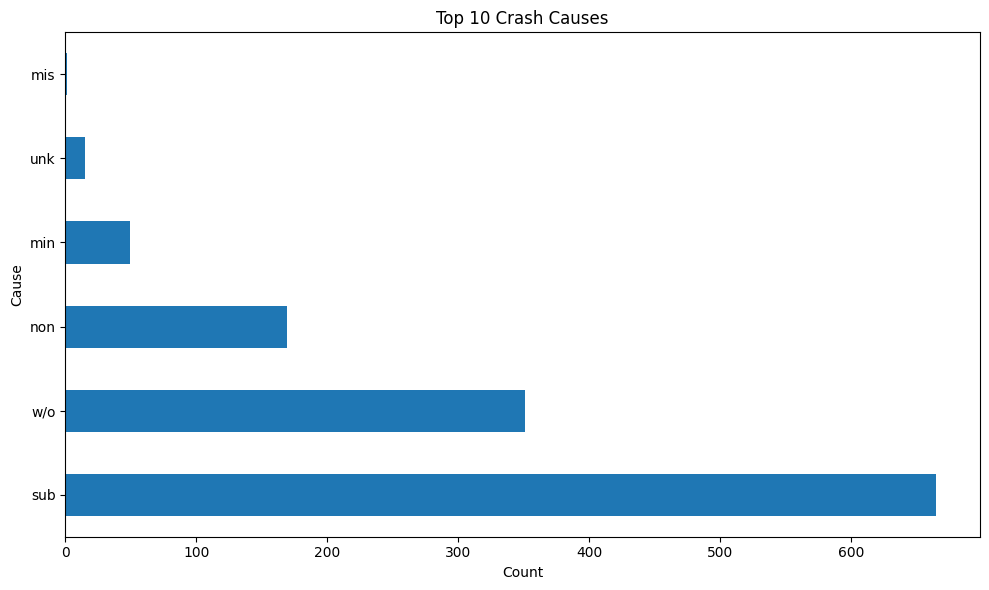

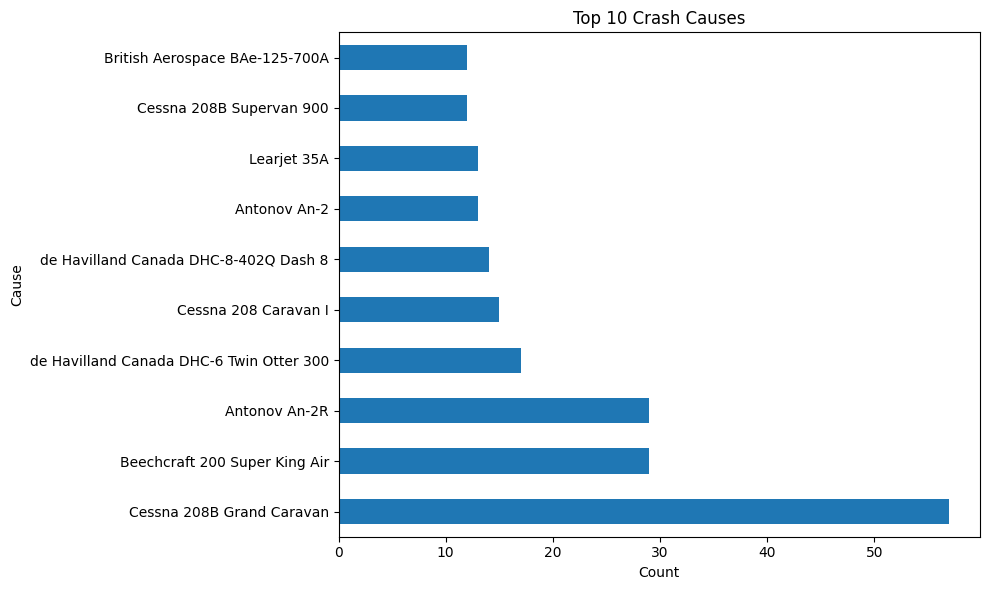

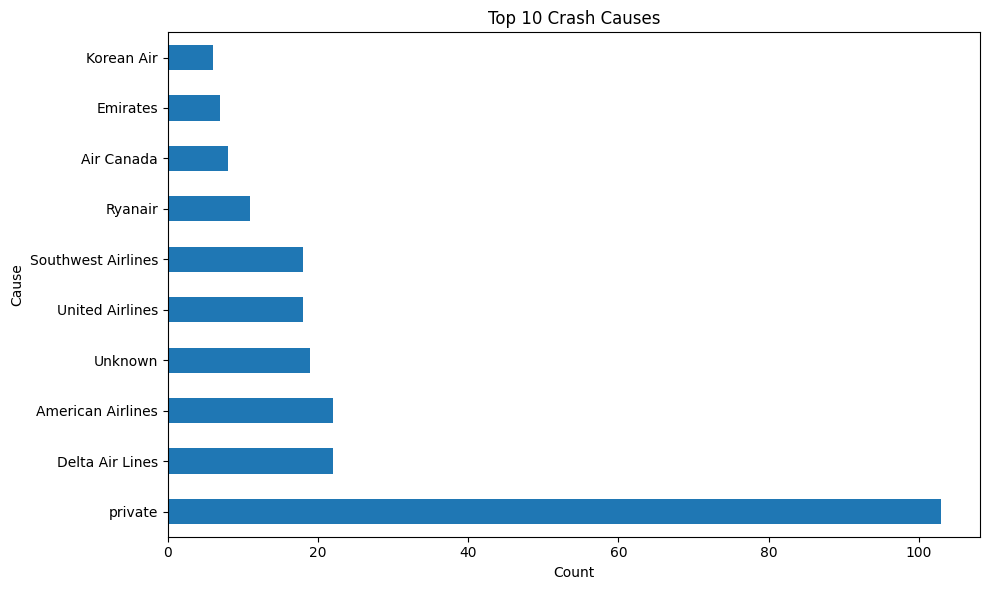

In [9]:
eda.top_crash_causes(cause_column='dmg', top_n=10)
# or maybe 'operator' or 'type' if you want to explore categories
eda.top_crash_causes(cause_column='type', top_n=10)
eda.top_crash_causes(cause_column='operator', top_n=10)


<Axes: title={'center': 'Crashes per Year'}, xlabel='year'>

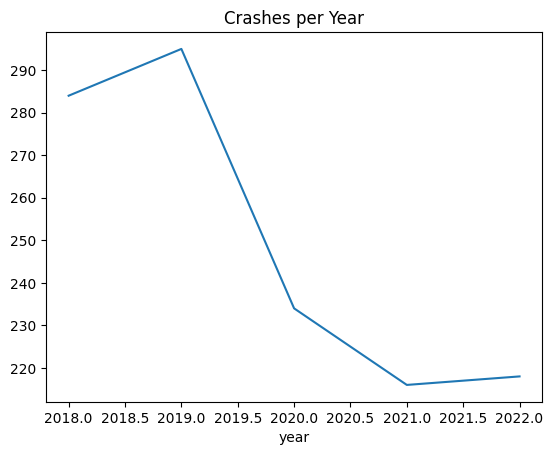

In [10]:
df['acc.date'] = pd.to_datetime(df['acc.date'])
df['year'] = df['acc.date'].dt.year
df['month'] = df['acc.date'].dt.month
df['year'].value_counts().sort_index().plot(kind='line', title="Crashes per Year")




In [11]:
df.columns

Index(['unnamed:_0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location',
       'dmg', 'year', 'month'],
      dtype='object')

In [12]:
df

,unnamed:_0,acc.date,type,reg,operator,fat,location,dmg,year,month
0,0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub,2022.0,1.0
1,1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub,2022.0,1.0
2,2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub,2022.0,1.0
3,3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o,2022.0,1.0
4,4,2022-01-12,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o,2022.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1245,1245,2018-12-20,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o,2018.0,12.0
1246,1246,2018-12-22,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub,2018.0,12.0
1247,1247,2018-12-24,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o,2018.0,12.0
1248,1248,2018-12-31,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub,2018.0,12.0


In [13]:
df.year.dtype


dtype('float64')

In [17]:
# Fill missing with a placeholder like 0 or average year
df['year'] = df['year'].fillna(0).astype(int)


In [18]:
df.year.dtype


dtype('int64')

In [27]:
print(df['year'].unique())
print(df['fat'].unique())


[2022    0 2021 2020 2019 2018]
['0' '2' '5' '14' '11' '132' '1' '22' '6' '4' '8' '0+2' '10' '3' '0+1'
 '19' '5+1' '62' '7' '12' '50+3' '28' '16' '9' '1+1' '18' '176' '97+1'
 '21' '26' '15' '157' '1+2' '13' '41' '1+5' '5+14' '21+6' '38' '71' '66'
 '39' '51' '257' '112' '20' '189']


In [28]:
df = df.dropna(subset=['year', 'fat'])

In [29]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')

In [30]:
df = df.dropna(subset=['year', 'fat'])

In [31]:
df['year'] = df['year'].astype(int)
df['fat'] = df['fat'].astype(int)

year
0         5
2018    962
2019    420
2020    334
2021    271
2022    287
Name: fat, dtype: int64


<Axes: xlabel='year'>

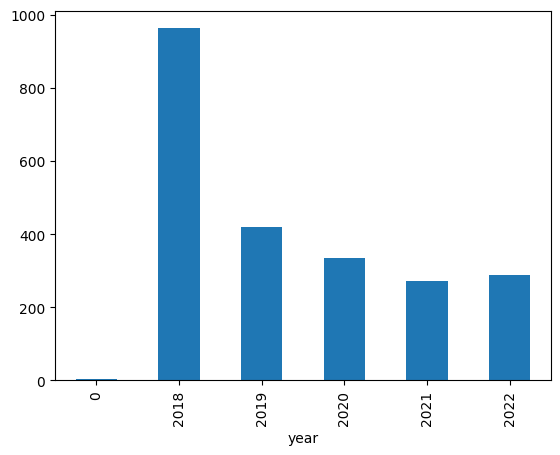

In [35]:
df_grouped = df.groupby('year')['fat'].sum()
print(df_grouped)
df_grouped.plot(kind='bar')


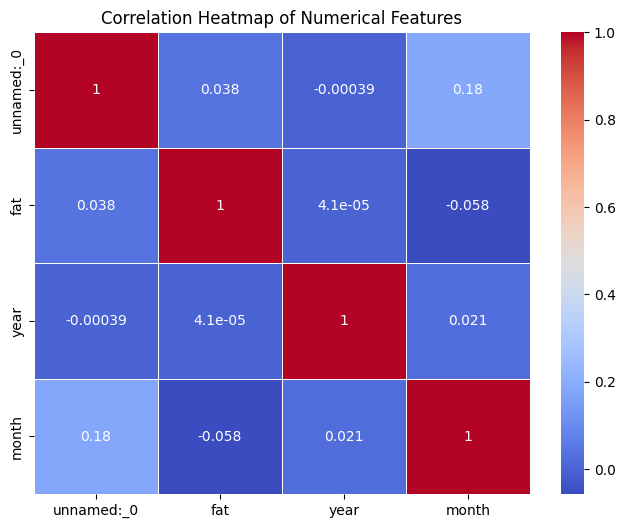

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



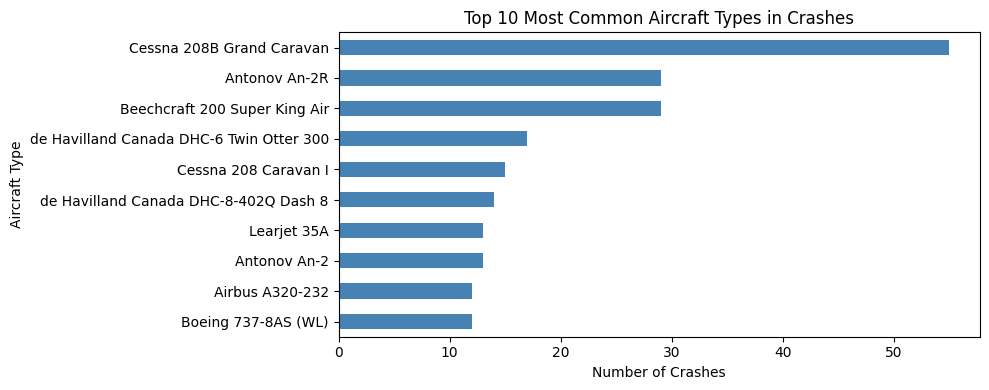

In [40]:
plt.figure(figsize=(10, 4))
df['type'].value_counts().head(10).plot(kind='barh', color='steelblue')
plt.title('Top 10 Most Common Aircraft Types in Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Aircraft Type')
plt.gca().invert_yaxis()  # optional: highest on top
plt.tight_layout()
plt.show()


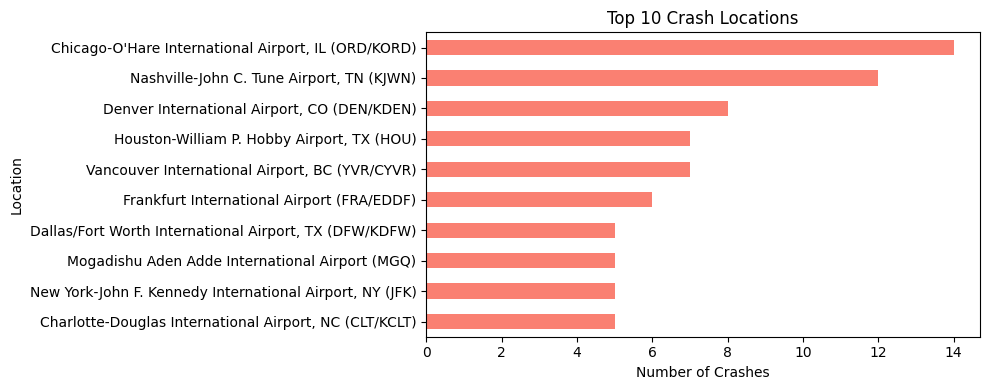

In [41]:
plt.figure(figsize=(10, 4))
df['location'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Crash Locations')
plt.xlabel('Number of Crashes')
plt.ylabel('Location')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 15 Operators Involved'}, ylabel='operator'>

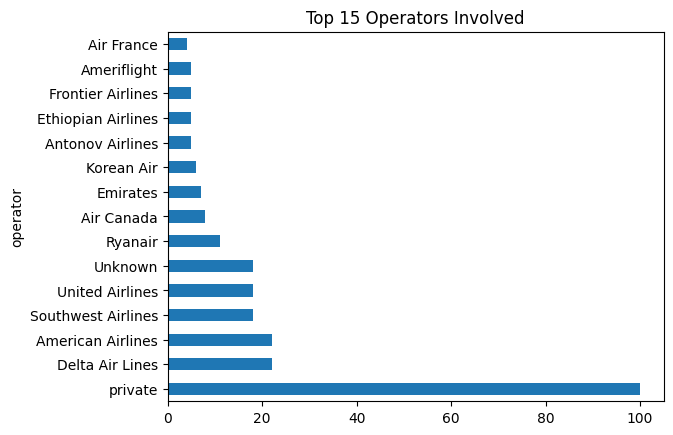

In [ ]:
df['operator'].value_counts().head(15).plot(kind='barh', title='Top 15 Operators Involved')